In [18]:
import tensorflow as tf
import numpy as np
import requests
from json import loads
from datetime import datetime
from time import sleep,time
import matplotlib.pyplot as plt

In [2]:
url = "https://www.binance.com/api/v3/klines?symbol={}&interval={}&startTime={}&limit={}"

def gethistoricaldata(symbol,interval,starttime,limit):
    u = url.format(symbol,interval,starttime,limit)
    s = requests.Session()
    text = s.get(u).text
    return loads(text) # candle stick history. 

def collect(symbol,interval,starttime,endtime=None,limit=5000):
    if endtime == None:
        now = int(time())*1000
    else:
        now = endtime
    lasttime = starttime
    t = {'1m':60,'3m':3*60,'5m':5*60,'1h':60*60}
    res = []
    while lasttime <= now - 1000*t[interval]:
        print(lasttime)
        data = gethistoricaldata(symbol,interval,lasttime,limit)
        res += data
        lasttime = data[-1][0]
        # sleep(0.1)
    return res


In [14]:
#################
#   Collect 
#################
data = collect("SOLUSDT",'1h',1546300800000)
data = [i[1:6] for i in data]
# data
X = np.array([data[i:i+24] for i in range(0,len(data),24)][:-1],dtype=float)

X.shape

1546300800000
1600722000000
1604318400000
1607918400000
1611529200000
1615132800000
1618729200000
1622343600000
1625940000000
1629550800000
1633154400000
1636750800000
1640347200000
1643943600000
1647540000000
1651136400000
1654732800000


(691, 24, 5)

In [15]:
X = np.array(X,dtype=float)
X

array([[[2.8500000e+00, 3.4700000e+00, 2.8500000e+00, 2.9515000e+00,
         2.0032260e+04],
        [2.9515000e+00, 3.1355000e+00, 2.8800000e+00, 2.9224000e+00,
         4.2069370e+04],
        [2.9626000e+00, 3.0000000e+00, 2.9144000e+00, 2.9600000e+00,
         2.4280760e+04],
        ...,
        [3.1317000e+00, 3.3000000e+00, 3.1129000e+00, 3.2802000e+00,
         5.5281420e+04],
        [3.2802000e+00, 3.2953000e+00, 3.1500000e+00, 3.2611000e+00,
         4.0644950e+04],
        [3.2478000e+00, 3.2478000e+00, 3.1769000e+00, 3.2296000e+00,
         1.7503990e+04]],

       [[3.2192000e+00, 3.2641000e+00, 3.1323000e+00, 3.2538000e+00,
         6.9963600e+04],
        [3.2538000e+00, 3.3661000e+00, 3.2121000e+00, 3.3661000e+00,
         6.0332390e+04],
        [3.3577000e+00, 3.5200000e+00, 3.3500000e+00, 3.4503000e+00,
         2.4497689e+05],
        ...,
        [3.6449000e+00, 3.8128000e+00, 3.6228000e+00, 3.7593000e+00,
         6.1837960e+04],
        [3.7404000e+00, 3.936400

In [16]:
labels = [(i[-1][3] - i[0][0])/i[0][0] for i in X][1:]
X = X[:-1]

In [21]:
labels.shape

(690, 1)

In [22]:
labels = np.array(labels,dtype=float)
labels = labels.reshape((labels.shape[0],1))
X = X.reshape((690,1,24,5,1))

In [23]:
X.shape,labels.shape

((690, 1, 24, 5, 1), (690, 1))

In [47]:
x = tf.keras.layers.Input((1,48,5,1))
y = tf.keras.layers.Rescaling(1e-9)(x)
y = tf.keras.layers.Conv2D(32,(2,5),activation='relu')(y)
y = tf.keras.layers.Conv2D(16,(6,1),activation='relu')(y)
y = tf.keras.layers.Conv2D(8,(6,1),activation='relu')(y)
y = tf.keras.layers.Conv2D(4,(6,1),activation='relu')(y)
y = tf.keras.layers.Conv2D(2,(6,1),activation='relu')(y)
y = tf.keras.layers.Conv2D(1,(6,1),activation='relu')(y)
y = tf.keras.layers.Flatten()(y)
y = tf.keras.layers.Dense(1,activation='relu')(y)
m = tf.keras.Model(inputs=x,outputs=y)
m.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),loss='mean_absolute_error',metrics=['acc'])
m.summary()



Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1, 48, 5, 1)]     0         
                                                                 
 conv2d_62 (Conv2D)          (None, 1, 47, 1, 32)      352       
                                                                 
 conv2d_63 (Conv2D)          (None, 1, 42, 1, 16)      3088      
                                                                 
 conv2d_64 (Conv2D)          (None, 1, 37, 1, 8)       776       
                                                                 
 conv2d_65 (Conv2D)          (None, 1, 32, 1, 4)       196       
                                                                 
 conv2d_66 (Conv2D)          (None, 1, 27, 1, 2)       50        
                                                                 
 conv2d_67 (Conv2D)          (None, 1, 22, 1, 1)       13  

In [37]:
m.fit(x = X,y=labels,epochs=100)

Epoch 1/100
22/22 [==============================] - 0s 12ms/step - loss: 1.0559 - acc: 0.0000e+00
Epoch 2/100
22/22 [==============================] - 0s 6ms/step - loss: 1.0746 - acc: 0.0000e+00
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 1.0732 - acc: 0.0000e+00
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 1.0481 - acc: 0.0000e+00
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 1.0324 - acc: 0.0000e+00
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 1.0232 - acc: 0.0000e+00
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 1.0110 - acc: 0.0000e+00
Epoch 8/100
22/22 [==============================] - 0s 6ms/step - loss: 0.9929 - acc: 0.0000e+00
Epoch 9/100
22/22 [==============================] - 0s 5ms/step - loss: 0.9855 - acc: 0.0000e+00
Epoch 10/100
22/22 [==============================] - 0s 5ms/step - loss: 0.9723 - acc: 0.0000e+00
Epoch 11/100
22/22

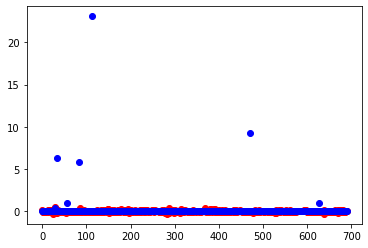

In [38]:
import matplotlib.pyplot as plt

l = labels.flatten()
p = m(X).numpy().flatten()
plt.scatter(range(len(l)),l,c='r')
plt.scatter(range(len(l)),p,c='b')
plt.show()


